In [53]:
#import every function and library needed

import cv2
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage.io import imread
from skimage.transform import rotate, resize

(4724, 6992, 3)


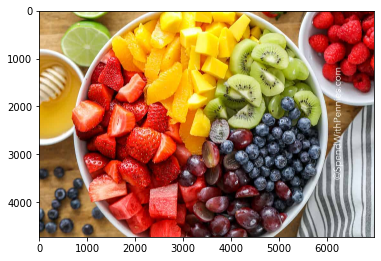

In [54]:
#open files
colorFilter = imread('vine_RGB_0.1.png')
colorFilter = colorFilter[:,:,0:3]
image = imread('Fruit.jpg')
image = cv2.rotate(image, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)

print(np.shape(colorFilter))
shape = np.shape(np.transpose(colorFilter[:,:,0]))
image = cv2.resize(image, shape, interpolation = cv2.INTER_AREA)

plt.figure(figsize=(6,6))
plt.imshow(image)

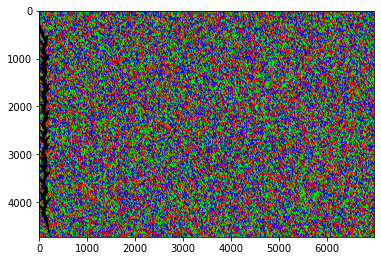

In [55]:
plt.figure(figsize=(6,6))
plt.imshow(colorFilter)

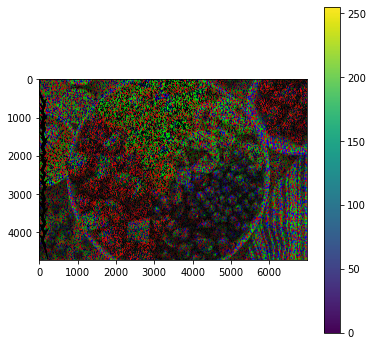

In [56]:
comp = ((255-image) * (colorFilter))

plt.figure(figsize=(6,6))

plt.imshow(comp)
plt.colorbar()


True

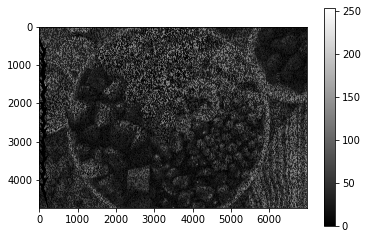

In [57]:
grey = cv2.cvtColor(comp, cv2.COLOR_BGR2GRAY)

plt.imshow(grey, cmap='gray')
plt.colorbar()
cv2.imwrite("film.png", grey)

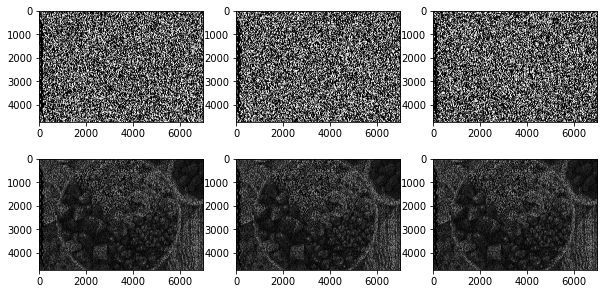

In [58]:
#Break the colorFilter into component RGB colors

cutoff, colorFilterR = cv2.threshold(colorFilter[:,:,0], 10, 255, cv2.THRESH_BINARY)
cutoff, colorFilterG = cv2.threshold(colorFilter[:,:,1], 10, 255, cv2.THRESH_BINARY)
cutoff, colorFilterB = cv2.threshold(colorFilter[:,:,2], 10, 255, cv2.THRESH_BINARY)

film = grey

fig, axs = plt.subplots(2,3, figsize=(10, 5))
axs[0,0].imshow(colorFilterR, cmap='gray')
axs[0,1].imshow(colorFilterG, cmap='gray')
axs[0,2].imshow(colorFilterB, cmap='gray')
axs[1,0].imshow(film, cmap='gray')
axs[1,1].imshow(film, cmap='gray')
axs[1,2].imshow(film, cmap='gray')
plt.show()

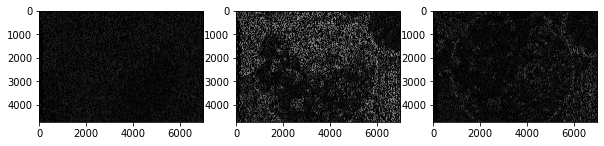

In [59]:
#Multiply each colorFilter color by the black and white film photo

fig, axs = plt.subplots(1,3, figsize=(10, 5))
R = 255-((colorFilterR) * (255-film))
G = 255 - (colorFilterG * (255-film))
B = 255 - (colorFilterB * (255-film))
axs[0].imshow(R, cmap='Greys')
axs[1].imshow(G, cmap='Greys')
axs[2].imshow(B, cmap='Greys')
plt.show()

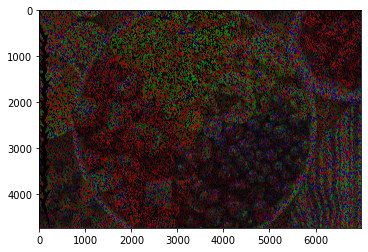

In [60]:
#Add the color spectra together to get reconstructed color image
color = [6,1,2]

R_new = color[0]*np.expand_dims(R, 2)
G_new = color[1]*np.expand_dims(G, 2)
B_new = color[2]*np.expand_dims(B, 2)
temp = np.append(R_new, G_new, axis=2)
reconst_img = np.append(temp, B_new, axis=2)

plt.imshow(255-reconst_img)